# Pedestrian Detection Model

In [1]:
#Importing all the packages required
import cv2
import sys
from imutils.object_detection import non_max_suppression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagePath = "pedestrians.jpg"
cascPath = "haarcascade_pedestrian.xml"

In [3]:
#Creating cascade classifier
pedsCascade = cv2.CascadeClassifier (cascPath)

In [4]:
#Reading the image
dum = cv2.imread (imagePath)
image = cv2.cvtColor (dum, cv2.COLOR_BGR2RGB)
copy = image.copy ()
gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)

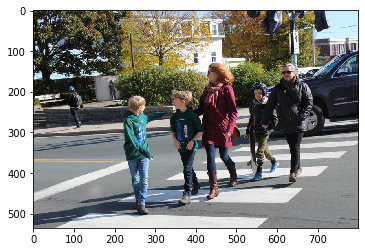

In [5]:
#Displaying original image
plt.imshow (image)
plt.show ()

In [6]:
#Detecting pedestrians
peds = pedsCascade.detectMultiScale (gray, scaleFactor = 1.33, minNeighbors = 6, minSize = (30, 30))

In [7]:
#creatinng rectangles over pedestrians
for (x, y, w, h) in peds:
    cv2.rectangle (copy, (x, y), (x + w, y + h), (255, 0, 0), 2)

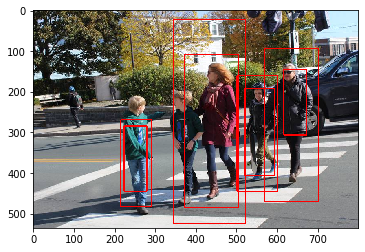

In [8]:
#Displaying rectangles (red) over picture
plt.imshow (copy)
plt.show ()

In [9]:
#Converting color scheme for saving correctly
copy = cv2.cvtColor (copy, cv2.COLOR_RGB2BGR)

In [10]:
#Saving preliminary image
status = cv2.imwrite ('peds_nsaved.jpg', copy)
print ("Image written to file system: ", status)

Image written to file system:  True


In [11]:
#Applying non max suppression 
peds = np.array([[x, y, x + w, y + h] for (x, y, w, h) in peds])
pick = non_max_suppression(peds, probs=None, overlapThresh=0.65)

In [12]:
#Displaying number of pedestrians 
print ("Found {0} Pedestrians".format (len (pick)))

Found 4 Pedestrians


In [13]:
#Creating rectangles
for (xA, yA, xB, yB) in pick:
    cv2.rectangle (image, (xA, yA), (xB, yB), (0, 255, 0), 2)

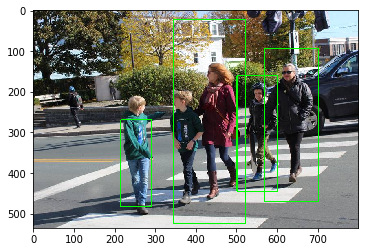

In [14]:
#Displaying rectangles over the image
plt.imshow (image)
plt.show ()

In [15]:
#Converting color scheme 
image = cv2.cvtColor (image, cv2.COLOR_RGB2BGR)

In [16]:
#Saving image
status = cv2.imwrite ('peds_saved.jpg', image)
print ("Image written to file system: ", status)

Image written to file system:  True
